## First import packages

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#point out * when cell is running. need to wait
#show how once the dataset is loaded we can run experiments without loading again
#if you change datatype of variable restart kernel

#use sklearn make_moons to create a toy dataset
#popular for testing classifiers
#creates 2 np arrays - 1 with 2 features and a third with an outcome value 0 or 1
#centers=2 will give 2 outcomes - 0 or 1
data = make_blobs(10, random_state=2, centers=2)
data

(array([[  1.53230788,  -1.88971185],
        [ -0.72864791,  -7.18926735],
        [  0.11514166,  -1.44998632],
        [  0.97411906,  -0.11855093],
        [  0.24537861,  -1.2845269 ],
        [ -3.07353754, -10.32322273],
        [ -0.77722054, -10.72676345],
        [  1.24982001,  -2.2823312 ],
        [ -1.23856256, -10.59940081],
        [ -2.33805418, -10.39048298]]),
 array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0]))

## Next get the data

In [2]:
#convert make_moons to pandas dataframe
features = data[0]
target = data[1]
df = pd.DataFrame(features)
df['target'] = target
df


,0,1,target
0,1.532308,-1.889712,1
1,-0.728648,-7.189267,0
2,0.115142,-1.449986,1
3,0.974119,-0.118551,1
4,0.245379,-1.284527,1
5,-3.073538,-10.323223,0
6,-0.777221,-10.726763,0
7,1.249820,-2.282331,1
8,-1.238563,-10.599401,0
9,-2.338054,-10.390483,0


Convert column names to *feature1, feature2, and target*

Convert column names to **feature1, feature2, and target**

In [3]:
#check data type of features and target
#convert column names to feature1, feature2, target
df.columns = ['feature1', 'feature2', 'target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  10 non-null     float64
 1   feature2  10 non-null     float64
 2   target    10 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 328.0 bytes


In [4]:
df

,feature1,feature2,target
0,1.532308,-1.889712,1
1,-0.728648,-7.189267,0
2,0.115142,-1.449986,1
3,0.974119,-0.118551,1
4,0.245379,-1.284527,1
5,-3.073538,-10.323223,0
6,-0.777221,-10.726763,0
7,1.249820,-2.282331,1
8,-1.238563,-10.599401,0
9,-2.338054,-10.390483,0


In [5]:
#get general stats on entire dataframe
df.describe()

,feature1,feature2,target
count,10.000000,10.000000,10.000000
mean,-0.403926,-5.625424,0.500000
std,1.523264,4.591295,0.527046
min,-3.073538,-10.726763,0.000000
25%,-1.123227,-10.373668,0.000000
50%,-0.306753,-4.735799,0.500000
75%,0.791934,-1.559918,1.000000
max,1.532308,-0.118551,1.000000


In [6]:
#get the mean of feature1 only
df['feature1'].mean()

-0.4039255513756313

In [7]:
#get the mean of each feature by target value
avg = df.groupby(df['target']).mean()
avg

,feature1,feature2
target,,
0,-1.631205,-9.845827
1,0.823353,-1.405021


In [10]:
#counts = df.groupby(df['target']).count()
counts = df['target'].value_counts()
counts

0    5
1    5
Name: target, dtype: int64

| Outcome  |   |
|----------|---|
| No     | 5 |
| Yes    | 5 |

In [ ]:
#access sample 4
df.iloc[3,:]

In [ ]:
#access samples 5-10 (sample numbers start at 0)
df.iloc[4:,:]

In [ ]:
#access just the first feature
df.iloc[4:,0]

In [ ]:
#use loc if you use column name
df.loc[4:,'feature1']

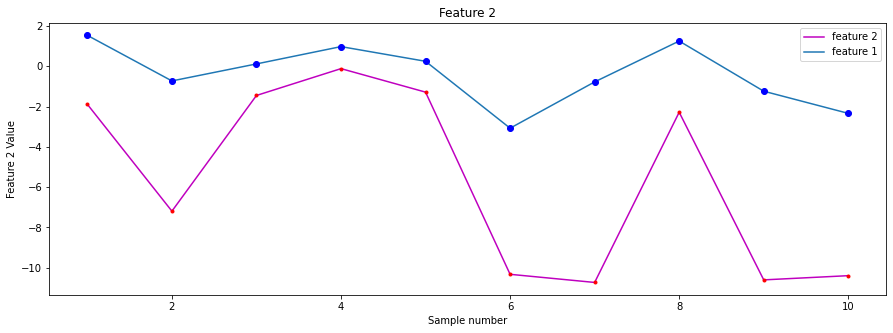

In [12]:
#Visualize data
#Create a simple plot of feature 1 and values
samples = np.arange(1,11)
#figsize is width, height
plt.figure(figsize=(15,5))
#plot (x, y)
#line plot
plt.plot(samples,df['feature2'],'m',label="feature 2")
#green dots
plt.plot(samples,df['feature2'], 'r.')
#see documention for more info: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(samples, df['feature1'],label="feature 1")
plt.plot(samples, df['feature1'], 'bo')
plt.title("Feature 2")
plt.xlabel("Sample number")
plt.ylabel("Feature 2 Value")
plt.legend()
plt.show()


In [ ]:
#create multiple plots in one figure
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,5))
ax[0,0].plot(samples, df['feature1'], '-g')
ax[0,1].plot(samples, df['feature1'], 'ro')
ax[1,0].plot(samples, df['feature2'], '--r')
ax[1,1].plot(samples, df['feature2'], 'bo')
fig.suptitle("2 Features 4 Ways")

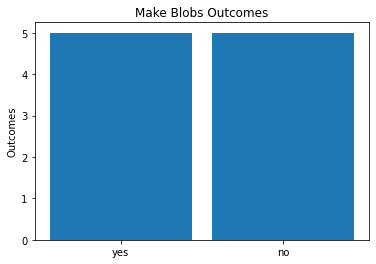

In [20]:
#What we want is a histogram of the outcomes
#Bar chart does better job here since we only have 2 values of the outcome - 0 or 1
counts = df['target'].value_counts()
outcomes = (df['target'])
#width between bars
w = 0.35  
plt.bar(x=[0,.4], height=counts, width = w)
plt.xticks([0,.4], ("yes", 'no'))

plt.ylabel('Outcomes')
plt.title('Make Blobs Outcomes')

plt.show()

In [ ]:
#scatter plot
plt.scatter(df['feature1'],df['feature2'])
plt.title("Scatter Plot of Features")
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()